<a href="https://colab.research.google.com/github/rogeriodelphi/trader_esportivo_analises/blob/main/FutPythonTrader_An%C3%A1lises_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
# Baixando a panilha do Football Data
df1 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2223/E0.csv')
df2 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2324/E0.csv')
df = [df1, df2]
df = pd.concat(df)

In [3]:
# Selecionando as colunas que serão utilizadas
df = df[['Date','HomeTeam','AwayTeam','B365H','B365D','B365A','FTHG','FTAG','FTR']]

#Renomeando as Colunas
df.columns = ['Data','Casa','Visitante','Odds_Casa','Odds_Empate','Odds_Visitante','Gols_casa','Gols_Vititante','Resultado']

In [4]:
# Visualizando o DataFrame
df

,Data,Casa,Visitante,Odds_Casa,Odds_Empate,Odds_Visitante,Gols_casa,Gols_Vititante,Resultado
0,05/08/2022,Crystal Palace,Arsenal,4.20,3.60,1.85,0,2,A
1,06/08/2022,Fulham,Liverpool,11.00,6.00,1.25,2,2,D
2,06/08/2022,Bournemouth,Aston Villa,3.75,3.50,2.00,2,0,H
3,06/08/2022,Leeds,Wolves,2.25,3.40,3.20,2,1,H
4,06/08/2022,Newcastle,Nott'm Forest,1.66,3.80,5.25,2,0,H
...,...,...,...,...,...,...,...,...,...
173,23/12/2023,Luton,Newcastle,4.75,4.20,1.65,1,0,H
174,23/12/2023,Nott'm Forest,Bournemouth,2.75,3.40,2.55,2,3,A
175,23/12/2023,Tottenham,Everton,1.75,4.20,4.00,2,1,H
176,23/12/2023,Liverpool,Arsenal,2.38,3.60,2.80,1,1,D


In [5]:
# Ajustando o índice
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº do Jogo'])
df = df.rename(index=lambda x: x + 1)

In [6]:
# Visualizando o DataFrame
df

,Data,Casa,Visitante,Odds_Casa,Odds_Empate,Odds_Visitante,Gols_casa,Gols_Vititante,Resultado
Nº do Jogo,,,,,,,,,
1,05/08/2022,Crystal Palace,Arsenal,4.20,3.60,1.85,0,2,A
2,06/08/2022,Fulham,Liverpool,11.00,6.00,1.25,2,2,D
3,06/08/2022,Bournemouth,Aston Villa,3.75,3.50,2.00,2,0,H
4,06/08/2022,Leeds,Wolves,2.25,3.40,3.20,2,1,H
5,06/08/2022,Newcastle,Nott'm Forest,1.66,3.80,5.25,2,0,H
...,...,...,...,...,...,...,...,...,...
554,23/12/2023,Luton,Newcastle,4.75,4.20,1.65,1,0,H
555,23/12/2023,Nott'm Forest,Bournemouth,2.75,3.40,2.55,2,3,A
556,23/12/2023,Tottenham,Everton,1.75,4.20,4.00,2,1,H


In [7]:
# Perdas e Lucros - Back Linear
win_Back_H = 1 * df.Odds_Casa - 1
win_Back_D = 1 * df.Odds_Empate - 1
win_Back_A = 1 * df.Odds_Visitante - 1
lose = -1

df['Back_Casa'] = win_Back_H.where(df.Resultado == 'H', other=lose)
df['Back_Empate'] = win_Back_D.where(df.Resultado == 'D', other=lose)
df['Back_Visitante'] = win_Back_A.where(df.Resultado == 'A', other=lose)


<Axes: title={'center': 'Back Casa'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

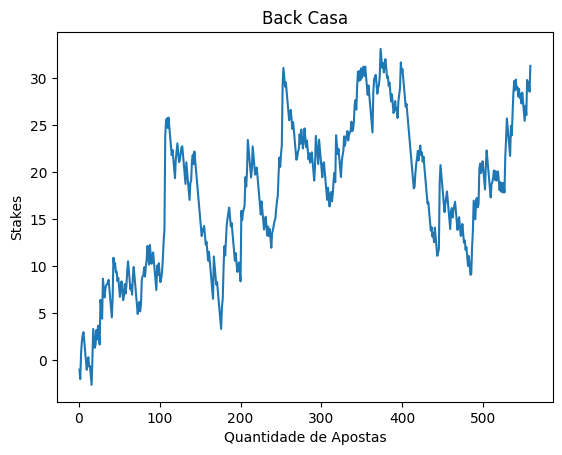

In [8]:
# Back Casa
df['BackCasa_acu'] = df.Back_Casa.cumsum()
df.BackCasa_acu.plot(title='Back Casa', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Back Empate'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

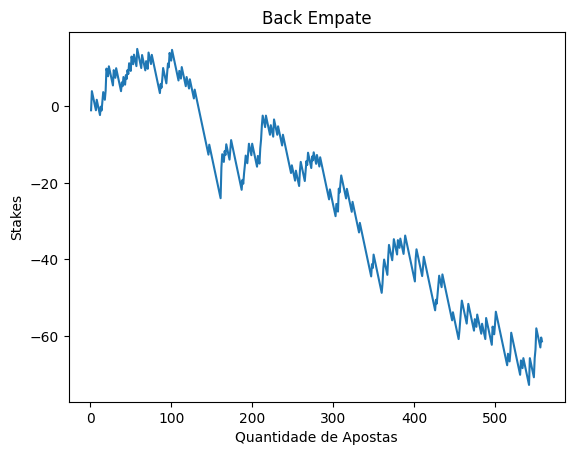

In [9]:
# Back Empate
df['BackEmpate_acu'] = df.Back_Empate.cumsum()
df.BackEmpate_acu.plot(title='Back Empate', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Back Visitante'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

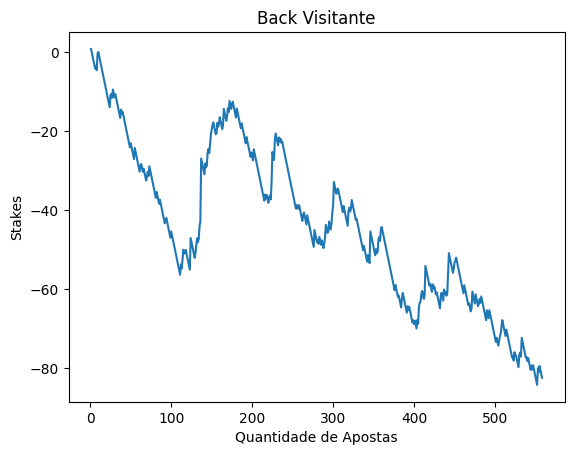

In [10]:
# Back Visitante
df['BackVisitante_acu'] = df.Back_Visitante.cumsum()
df.BackVisitante_acu.plot(title='Back Visitante', xlabel='Quantidade de Apostas', ylabel='Stakes')

In [11]:
# Perdas e lucros - Lay Linear
win_Lay_Casa = 1 / (df.Odds_Casa - 0.99)
win_Lay_Empate = 1 / (df.Odds_Empate - 0.99)
win_Lay_Visitante = 1 / (df.Odds_Visitante - 0.99)
lose = -1

df['Lay_Casa'] = win_Lay_Casa.where(df.Resultado != 'H', other=lose)
df['Lay_Empate'] = win_Lay_Empate.where(df.Resultado != 'D', other=lose)
df['Lay_Visitante'] = win_Lay_Visitante.where(df.Resultado != 'A', other=lose)

<Axes: title={'center': 'Lay Home'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

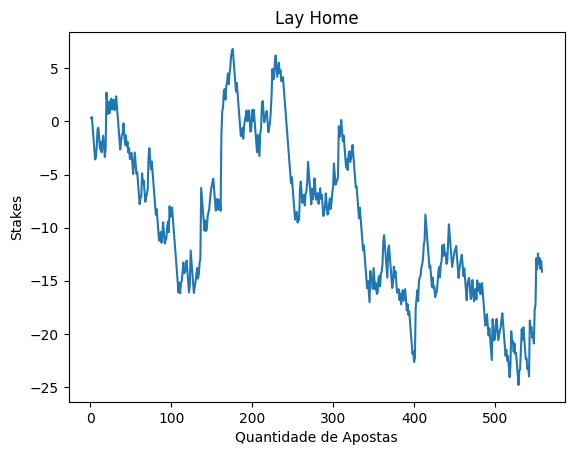

In [12]:
# Lay Casa
df['LayCasa_acu'] = df.Lay_Casa.cumsum()
df.LayCasa_acu.plot(title='Lay Home', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Lay Empate'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

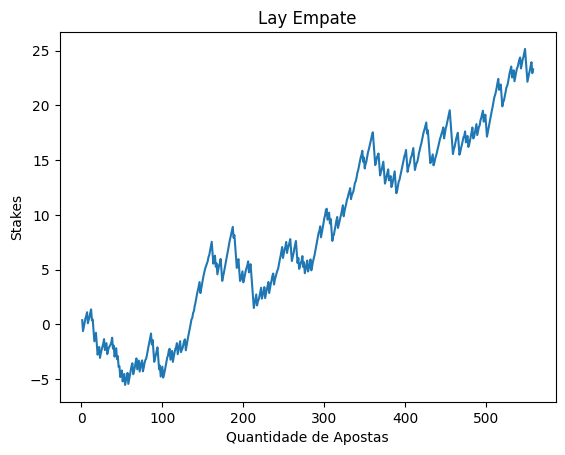

In [13]:
# Lay Empate
df['LayEmpate_acu'] = df.Lay_Empate.cumsum()
df.LayEmpate_acu.plot(title='Lay Empate', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Lay Visitante'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

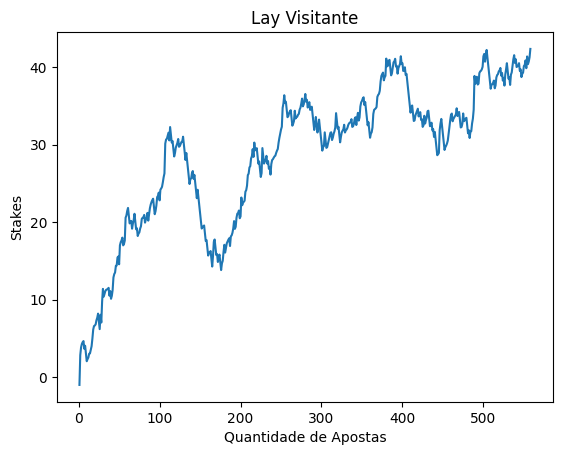

In [14]:
# Lay Visitante
df['LayVisitante_acum'] = df.Lay_Visitante.cumsum()
df.LayVisitante_acum.plot(title='Lay Visitante', xlabel='Quantidade de Apostas', ylabel='Stakes')